# Simple Image classification: Classify images of clothing

 [**ReSources**]('https://www.tensorflow.org/tutorials/keras/classification')
 
 ###### Intro:
     We will trains a neural network model to classify images of clothing, like sneakers and shirts. We uses high level API to train model in Tensorflow.

### Import libraries:

In [1]:
# Basic libraries for data manipulation, visualization,etc.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML and DL library:
import tensorflow as tf
print(tf.__version__)

2.7.0


### Import datasets and loads datasets

We uses the **`Fashion MNIST`** dataset which contains 70k grayscale images of various cloths with resoluation having (28x28)pixels. MINST Fashion uses for variety, with more complex ways. Here, 60k images is used to train models and 10k is used to test predict. We can access the Fashion MNIST directly from `TensorFlow`.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 2s 0us/step


Loading the dataset returns four NumPy arrays:

   * The `train_images` and `train_labels` arrays are the training set—the data the model uses to learn.

   * The model is tested against the test set, the `test_images`, and `test_labels` arrays.
   

An images of 28x28 pixels can be considered as a NumPy arrays of 28x28 with values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the images.

    0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Exploratory Data Analysis

In [6]:
## Features of all train data
train_images.shape

(60000, 28, 28)

In [7]:
## targets of all train datasets
len(train_labels)

60000

In [8]:
display(train_labels)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

**Observation** - Train data have 60K instances and its targets have 10 unique different values(0-9). Each instance of train represents an image where digits from 0 to 9 is written.

In [13]:
test_labels.shape

(10000,)

In [14]:
test_images.shape

(10000, 28, 28)

Test datasets contains 10K datasets.

In [17]:
## Viewing the first-few rows of datasets
train_images[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

### Preprocess the Data

The data must be preprocessed before training the network. If we plot the first image training set, we will observe pixel range of 0 to 255

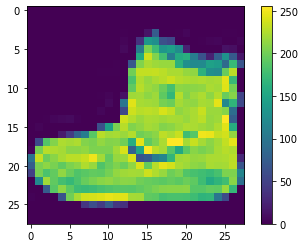

Text(0.5, 0, 'Ankle boot')

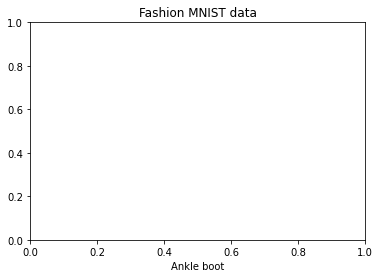

In [21]:
plt.figure()

plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
plt.title("Fashion MNIST data")
plt.xlabel(class_names[train_labels[0]])